# Twitter API using tweepy 

In [36]:
import pandas as pd 
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import sys
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')
import json

In [87]:
# tokens
c_key = 'MbV3i8FSluNaYm8din7nKBQHu'
c_secret = 'Mc3XXfmPx6fA8MzOwBvu84F5AMvgDp4XI8WI0tFtUWCQqWT1iQ'
a_token = '1295111663046340614-juLEYcY1HHzrt4F21GXDYuilTTYTA8'
a_secret = 'qK6VLVcvIzA8LoXiX7urUdOCWwWwkBBFzahWONvBBP3Ud'

# tweepy OAuth authenticator 
auth = tweepy.OAuthHandler(c_key, c_secret)
auth.set_access_token(a_token, a_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

posts = api.user_timeline(screen_name='AMCTheatres', count=10000, lang='en', tweet_mode='extended')

print('Five recent tweets from AMCTheatres: \n')
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i+=1

Five recent tweets from AMCTheatres: 

1) Now through 10/31, get your 1st month of #AMCTheatres #AList for just $5+tax, a savings of $15 or more! Which 3 movies will you see first? Subscribe now: https://t.co/IxXSDT9p9I https://t.co/m6XXytkVn0

2) Those aren't pillows! https://t.co/FJ7tMNYgxO

3) Make Monday movie night with #AMCTheatresOnDemand and get $3 rentals all-day long! Browse movies: https://t.co/dqh35PWEpm https://t.co/LiTw9SD4ep

4) Exclusive interview with @RussellCrowe and #carenpistorius welcoming you back for a classic big screen thriller. @UNHINGEDmovie opens 8/21, tickets on sale now: https://t.co/519E2QUsNd https://t.co/zEMz8omAhn

5) Experience AMC’s comprehensive health and sanitation program: AMC Safe &amp; Clean. Full details: https://t.co/xVA4ndQkGU https://t.co/yDOdway0Rt



In [90]:
api.rate_limit_status()


{'rate_limit_context': {'access_token': '1295111663046340614-juLEYcY1HHzrt4F21GXDYuilTTYTA8'},
 'resources': {'lists': {'/lists/list': {'limit': 15,
    'remaining': 15,
    'reset': 1597693000},
   '/lists/memberships': {'limit': 75, 'remaining': 75, 'reset': 1597693000},
   '/lists/subscribers/show': {'limit': 15,
    'remaining': 15,
    'reset': 1597693000},
   '/lists/members': {'limit': 900, 'remaining': 900, 'reset': 1597693000},
   '/lists/subscriptions': {'limit': 15, 'remaining': 15, 'reset': 1597693000},
   '/lists/show': {'limit': 75, 'remaining': 75, 'reset': 1597693000},
   '/lists/ownerships': {'limit': 15, 'remaining': 15, 'reset': 1597693000},
   '/lists/subscribers': {'limit': 180, 'remaining': 180, 'reset': 1597693000},
   '/lists/members/show': {'limit': 15, 'remaining': 15, 'reset': 1597693000},
   '/lists/statuses': {'limit': 900, 'remaining': 900, 'reset': 1597693000}},
  'application': {'/application/rate_limit_status': {'limit': 180,
    'remaining': 179,
    '

In [86]:
dates = []
for i in posts:
    dates.append(i.created_at)
print(min(dates))
print(max(dates))

2020-07-08 21:00:25
2020-08-17 17:00:00


In [49]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df1 = pd.DataFrame([]

In [50]:
df.head()

,Tweets
0,Exclusive interview with @RussellCrowe and #ca...
1,Experience AMC’s comprehensive health and sani...
2,"#NOMADLAND in theaters December 4, 2020\na fil..."
3,"Your choice of regular-size perfectly popcorn,..."
4,BEAUTY AND THE BEAST is back on the big screen...


In [51]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+','', text)
    return text

df['Tweets'] = df['Tweets'].apply(clean_text)

In [52]:
df['Tweets'].head()

0    Exclusive interview with  and carenpistorius w...
1    Experience AMC’s comprehensive health and sani...
2    NOMADLAND in theaters December 4, 2020\na film...
3    Your choice of regular-size perfectly popcorn,...
4    BEAUTY AND THE BEAST is back on the big screen...
Name: Tweets, dtype: object

In [53]:
# subjectivity 
def get_subj(text):
    return TextBlob(text).sentiment.subjectivity

# polarity
def get_polar(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(get_subj)
df['Polarity'] = df['Tweets'].apply(get_polar)

df.head()

,Tweets,Subjectivity,Polarity
0,Exclusive interview with and carenpistorius w...,0.088889,0.055556
1,Experience AMC’s comprehensive health and sani...,0.583333,0.405556
2,"NOMADLAND in theaters December 4, 2020\na film...",0.000000,0.000000
3,"Your choice of regular-size perfectly popcorn,...",1.000000,1.000000
4,BEAUTY AND THE BEAST is back on the big screen...,0.050000,0.000000


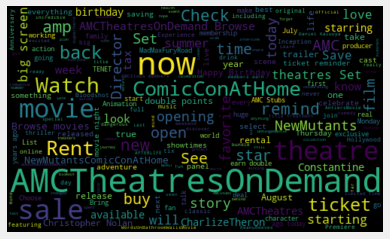

In [44]:
# word cloud
words = ' '.join([twt for twt in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state=21, max_font_size = 110).generate(words)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [47]:
words

'Exclusive interview with  and carenpistorius welcoming you back for a classic big screen thriller.  opens 8/21, tickets on sale now:   Experience AMC’s comprehensive health and sanitation program: AMC Safe &amp; Clean. Full details:   NOMADLAND in theaters December 4, 2020\na film by Chloé Zhao starring Frances McDormand   Your choice of regular-size perfectly popcorn, fountain drink, or KidsPack is just $5 through 10/31 at AMCTheatres! See showtimes:    BEAUTY AND THE BEAST is back on the big screen! Tickets are just 15¢ on 8/20 and $5 starting 8/21. AMCStubs members get double points- get tickets now!   Grab some recent releases in our summer blowout sale at AMCTheatresOnDemand! Browse movies available to buy for $7.99 or less:   Return to the theatre for a love story you\'ll never forget, featuring original music from . Opening 8/21, tickets for WORDSONBATHROOMWALLS are now on sale:   Get the annual AMC Stubs Premiere membership for just $5! Get waived online ticketing fees and $5 

In [19]:
search_words = input('Enter a keyword or hashtag to search: ')
no_of_search = int(input('How many tweets?'))

tweets = tweepy.Cursor(api.search, q=search_words, lang='English').items(no_of_search)
new_list = []
for tweet in tweets:
    new_list.append(tweet.text)
#     anaylsis = TextBlob(tweet.text)
new_list

Enter a keyword or hashtag to search: bitcoin
How many tweets?1


[]